# model is under fit so we go for crossvaliadation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#from the above discription of Columns :
#inputs are [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT]
#output is [MEDV]

In [3]:
# to load dataset
df=pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#check null values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [5]:
#cross check
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [6]:
#selecting input and output from dataset df_new
x=df.drop("medv",axis=1)  #select input
y=df["medv"]  #select outp[ut]

In [7]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [8]:
#train data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


In [9]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [10]:
#apply standard scaler on x_train and x_test
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [11]:
#training model with 70% data
#using linearregresion cause price is cont numeric
#multiple linear regression cause multiple input
from sklearn.linear_model import LinearRegression
#creating an object 
lr=LinearRegression()


In [12]:
#training model wityh 70% data
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
#check slope and intercept of each input
slope=lr.coef_
#print(slope)
#slope=[np.round(i) for i in slope]
print(slope)

[-0.83884271  1.42840065  0.40532651  0.67942473 -2.53039124  1.93381643
  0.10090715 -3.23615418  2.70318306 -1.91729896 -2.15578621  0.58227649
 -4.13433172]


In [14]:
#x_train.columns

In [15]:
#checking slope of all cols
dict={"input":x.columns,"slope":slope}
df1=pd.DataFrame(dict)
df1

,input,slope
0,crim,-0.838843
1,zn,1.428401
2,indus,0.405327
3,chas,0.679425
4,nox,-2.530391
5,rm,1.933816
6,age,0.100907
7,dis,-3.236154
8,rad,2.703183
9,tax,-1.917299


In [16]:
# check intercept
lr.intercept_

22.33983050847458

In [17]:
#check training score inbuilt method score() which is defined in inbuilt class linearregression

In [18]:
#score always in between 0-1 closer to 1 is good closet to 0 is bad
print("training score",lr.score(x_train,y_train))

training score 0.7103879080674731


In [19]:
#test the model with 30% data
y_pred=lr.predict(x_test)
y_pred

array([32.3914647 , 27.94401279, 17.83762764, 21.66941388, 18.93639614,
       20.01995795, 32.63414961, 17.86179976, 24.73211676, 26.77346826,
       27.26138023, 28.63243014, 21.16103038, 27.15098589, 23.33198614,
       21.02894005, 17.11819755, 37.52455938, 30.69864427,  8.46104486,
       20.83966032, 16.26732451, 25.05030307, 24.8069032 , 31.6789299 ,
       10.98989363, 13.54111562, 16.54697099, 35.86699683, 14.69589266,
       21.05655107, 13.90301353, 43.01321262, 17.80335305, 21.68817023,
       20.45077825, 17.38095983, 26.81334904, 10.08706217, 19.96174586,
       24.1983249 , 21.00202622, 29.38682967, 16.33215467, 19.37439646,
       14.45525235, 39.52670798, 18.18535021, 26.38536303, 20.41420863,
       25.08511581, 24.40208165, 24.87902769, 26.97887956,  4.93921657,
       24.0001365 , 10.66711602, 26.98494775, 16.63507993, 35.31652989,
       19.49249915, 27.37577863, 16.53965715, 19.09746715, 11.06765336,
       32.03445261, 36.15847648, 21.53547868, 24.96434626, 25.50

In [20]:
#or using r2score
from sklearn.metrics import mean_squared_error,r2_score
print("mean square error:",mean_squared_error(y_test,y_pred))
print("testing score",r2_score(y_test,y_pred))

mean square error: 19.831323672063156
testing score 0.783629538507629


In [21]:
#score always in between 0-1 closer to 1 is good closet to 0 is bad
print("training score",lr.score(x_train,y_train))

training score 0.7103879080674731


# testing score is less than training score means model is underfitt, do cross validation directly if model is underfitt

# why underfitt ?cause data is really less

In [23]:
df.shape

(506, 14)

In [24]:
#apply cross validation on 70% data
#call built in class cross_val_score
from sklearn.model_selection import cross_val_score

In [25]:
#creaye object of cross_val  #r2 score
lr_score=cross_val_score(lr,x_train,y_train,cv=5)
lr_score

array([0.49928471, 0.79566051, 0.60481958, 0.71988078, 0.70189495])

In [26]:
#find avg of lr_score
lr_score.mean()   #testing score

0.6643081077199129

In [27]:
#training score
#.71%
    

In [28]:
#check variance
#find residual
#first have to find y_pred
y_pred=lr.predict(x_test)

In [29]:
residual=y_pred-y_test
residual

307    4.191465
343    4.044013
47     1.237628
67    -0.330586
362   -1.863604
         ...   
467   -1.770041
95    -0.039766
122    0.294228
260   -0.101843
23    -0.981173
Name: medv, Length: 152, dtype: float64

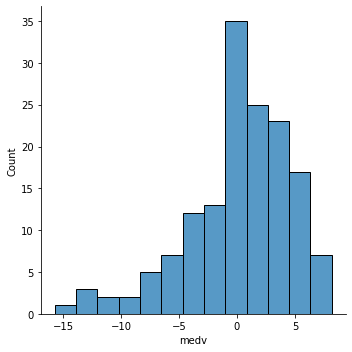

In [30]:
sb.displot(residual) #kind="rde"
plt.show()
#means data is normally distributed means mean=mode=meadian which is 10=10=10
#little skewness on -ve side but we can avoid that

In [31]:
#crfind mean square error
#scoring did not use then it will give by default r2 score
mse=cross_val_score(lr,x_train,y_train,cv=5,scoring="neg_mean_squared_error")
mse

array([-34.12809475, -17.98990088, -27.47132784, -28.45214047,
       -22.01184618])

In [32]:
#find avg of mean squared error
mse.mean()

-26.010662023166248